<a href="https://colab.research.google.com/github/KotarRohith/Concepts/blob/main/Week_2_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 2

## Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pytz

### Import data

In [2]:
from google.colab import drive
drive.mount("/content/drive")
!mkdir -p datashim
!cp /content/drive/Shareddrives/DS602-F22/Data/data602.py ./datashim
from datashim import data602

Mounted at /content/drive


In [3]:
cdf = data602.read_citations()
wdf = data602.read_weather()

## Question 1

Using the `weather` dataset, construct a derived data frame having the following qualities:

1. Each row represents an observation day
2. Each column represents an hourly temperature observation.  That is, the dataframe includes 24 columns of the form `tmpmeasx`	where x ranges from 0 to 23 and represents the observation taken that hour.  (For changes from daylight savings time to standard time, there are two observations at the 1:00 hour (local).  You may discard one of the values arbitrarily.)

In [4]:
wdf

,date,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog
0,2015-12-31 19:54:00-05:00,1.5,7.2,0.0,0,4.0,0,0,0,0
1,2015-12-31 20:54:00-05:00,3.1,6.1,0.0,0,4.0,0,0,0,0
2,2015-12-31 21:54:00-05:00,2.1,6.7,0.0,0,4.0,0,0,0,0
3,2015-12-31 22:54:00-05:00,2.6,6.1,0.0,0,4.0,0,0,0,0
4,2015-12-31 23:54:00-05:00,2.1,5.6,0.0,0,4.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
58462,2022-09-02 12:54:00-04:00,4.6,27.8,NaN,0,3.0,0,0,0,0
58463,2022-09-02 13:54:00-04:00,2.6,28.9,NaN,0,3.0,0,0,0,0
58464,2022-09-02 14:54:00-04:00,4.1,28.9,NaN,0,3.0,0,0,0,0
58465,2022-09-02 15:54:00-04:00,4.6,29.4,NaN,0,3.0,0,0,0,0


In [5]:
wdf_new = (wdf.assign(dt = wdf['date'].dt.date).assign(hr = wdf['date'].dt.hour))[["dt", "hr", "tmp_meas"]]
wdf_new

,dt,hr,tmp_meas
0,2015-12-31,19,7.2
1,2015-12-31,20,6.1
2,2015-12-31,21,6.7
3,2015-12-31,22,6.1
4,2015-12-31,23,5.6
...,...,...,...
58462,2022-09-02,12,27.8
58463,2022-09-02,13,28.9
58464,2022-09-02,14,28.9
58465,2022-09-02,15,29.4


In [6]:
wdf_new.duplicated().sum()

1

In [7]:
wdf_new.duplicated(["dt", "hr"]).value_counts()

False    58460
True         7
dtype: int64

In [8]:
wdf_new = wdf_new[~wdf_new.duplicated(["dt", "hr"])]
wdf_new

,dt,hr,tmp_meas
0,2015-12-31,19,7.2
1,2015-12-31,20,6.1
2,2015-12-31,21,6.7
3,2015-12-31,22,6.1
4,2015-12-31,23,5.6
...,...,...,...
58462,2022-09-02,12,27.8
58463,2022-09-02,13,28.9
58464,2022-09-02,14,28.9
58465,2022-09-02,15,29.4


In [9]:
wdf_new = wdf_new[~wdf_new.duplicated(["dt", "hr"])]
derived_df = wdf_new.pivot(index = "dt", columns="hr", values="tmp_meas")
derived_df.columns = [f"tmpmeas{x}" if type(x) is int else x for x in derived_df.columns]
derived_df

,tmpmeas0,tmpmeas1,tmpmeas2,tmpmeas3,tmpmeas4,tmpmeas5,tmpmeas6,tmpmeas7,tmpmeas8,tmpmeas9,...,tmpmeas14,tmpmeas15,tmpmeas16,tmpmeas17,tmpmeas18,tmpmeas19,tmpmeas20,tmpmeas21,tmpmeas22,tmpmeas23
dt,,,,,,,,,,,,,,,,,,,,,
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.2,6.1,6.7,6.1,5.6
2016-01-01,5.0,4.4,3.9,3.3,3.3,4.4,3.9,3.9,4.4,5.6,...,5.6,5.0,4.4,3.9,2.2,1.1,0.6,-0.6,0.6,0.6
2016-01-02,-0.6,-1.7,-1.7,-0.6,-2.8,-2.2,-2.8,-2.2,1.1,3.3,...,8.3,7.8,6.1,3.9,2.2,1.7,0.6,0.0,-1.1,-1.7
2016-01-03,-1.7,-1.7,-2.2,-2.8,-2.8,-0.6,-1.1,-2.8,1.7,5.6,...,11.1,10.6,8.9,5.6,3.9,2.8,1.7,0.6,0.0,-1.1
2016-01-04,-2.2,-1.7,-2.8,-1.7,0.0,0.0,0.6,0.6,0.6,0.0,...,1.1,0.0,-1.7,-2.2,-2.8,-3.3,-5.0,-6.1,-7.2,-8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-29,24.4,24.4,23.9,23.3,22.8,23.3,23.9,25.0,26.1,28.9,...,31.1,32.2,31.7,31.1,29.4,28.3,26.7,26.7,26.1,25.6
2022-08-30,25.0,24.4,24.4,23.9,23.9,23.9,23.9,24.4,26.7,28.9,...,33.9,34.4,24.4,22.8,23.9,23.3,23.3,23.3,23.3,22.2
2022-08-31,22.2,22.2,21.1,21.1,20.0,20.6,20.0,21.7,23.9,25.6,...,27.8,29.4,29.4,28.3,27.8,25.0,22.2,20.6,21.1,19.4


In [10]:
avg_diff = derived_df.tmpmeas14 - derived_df.tmpmeas2
avg_diff.describe()

count    2430.000000
mean        7.131770
std         4.840049
min       -12.700000
25%         3.900000
50%         7.200000
75%        10.500000
max        22.800000
dtype: float64

Using this derived dataset, show the average difference in temperature, standard deviation, and max/min values between observations taken in hours 2 (about 2:56am) and 14 (about 14:56, or 2:56pm).

**Clarification:** The derived (reshaped) data frame should comprise about 2,438 rows (one row for each distinct date in the data set) and 25 columns (representing date and 24 hourly measurements).  Assign a new column calculated as the difference between `tmpmeas14` and `tmpmeas2`.  This calculated column represents the temperature increase for the day between 2:56 and 14:56.  Find the summary statistics (mean, max, min, and standard deviation) for this column.


In [11]:
derived_df['tempdiff']=derived_df.tmpmeas14 - derived_df.tmpmeas2
derived_df

,tmpmeas0,tmpmeas1,tmpmeas2,tmpmeas3,tmpmeas4,tmpmeas5,tmpmeas6,tmpmeas7,tmpmeas8,tmpmeas9,...,tmpmeas15,tmpmeas16,tmpmeas17,tmpmeas18,tmpmeas19,tmpmeas20,tmpmeas21,tmpmeas22,tmpmeas23,tempdiff
dt,,,,,,,,,,,,,,,,,,,,,
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.2,6.1,6.7,6.1,5.6,NaN
2016-01-01,5.0,4.4,3.9,3.3,3.3,4.4,3.9,3.9,4.4,5.6,...,5.0,4.4,3.9,2.2,1.1,0.6,-0.6,0.6,0.6,1.7
2016-01-02,-0.6,-1.7,-1.7,-0.6,-2.8,-2.2,-2.8,-2.2,1.1,3.3,...,7.8,6.1,3.9,2.2,1.7,0.6,0.0,-1.1,-1.7,10.0
2016-01-03,-1.7,-1.7,-2.2,-2.8,-2.8,-0.6,-1.1,-2.8,1.7,5.6,...,10.6,8.9,5.6,3.9,2.8,1.7,0.6,0.0,-1.1,13.3
2016-01-04,-2.2,-1.7,-2.8,-1.7,0.0,0.0,0.6,0.6,0.6,0.0,...,0.0,-1.7,-2.2,-2.8,-3.3,-5.0,-6.1,-7.2,-8.3,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-29,24.4,24.4,23.9,23.3,22.8,23.3,23.9,25.0,26.1,28.9,...,32.2,31.7,31.1,29.4,28.3,26.7,26.7,26.1,25.6,7.2
2022-08-30,25.0,24.4,24.4,23.9,23.9,23.9,23.9,24.4,26.7,28.9,...,34.4,24.4,22.8,23.9,23.3,23.3,23.3,23.3,22.2,9.5
2022-08-31,22.2,22.2,21.1,21.1,20.0,20.6,20.0,21.7,23.9,25.6,...,29.4,29.4,28.3,27.8,25.0,22.2,20.6,21.1,19.4,6.7


## Question 2

**Circular data and One-Hot Encoding** Using the `Citations` data frame (`cdf`), discard records where the violation timestamp is not between January 1, 2021 and July 1, 2022.

In [12]:
cdf

,citation,tag,state,violcode,description,violfine,violdate,location,violdtl
0,91,03W671,MD,27,No Stop/Park Street Cleaning,52,2011-12-09 11:55:00-05:00,<NA>,2011-12-09 11:55:00
1,166,T294093T,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2011-12-09 12:39:00-05:00,<NA>,2011-12-09 12:39:00
2,299,19TLR318,ME,99,All Other Stopping or Parking Violations,32,2011-12-09 11:55:00-05:00,<NA>,2011-12-09 11:55:00
3,315,14TLR551,ME,99,All Other Stopping or Parking Violations,32,2011-12-09 12:01:59-05:00,<NA>,2011-12-09 12:01:59
4,562,9AE2340,MD,18,All Other Parking Meter Violations,32,2011-12-12 10:47:00-05:00,LAFAYETTE MARKET LOT Baltimore MD,2011-12-12 10:47:00
...,...,...,...,...,...,...,...,...,...
6599551,500146564,7FA7955,MD,31,Right on Red,75,2022-08-16 09:38:00-04:00,<NA>,2022-08-16 09:38:00
6599552,500146565,IBT1204,MD,31,Right on Red,75,2022-08-16 09:39:00-04:00,<NA>,2022-08-16 09:39:00
6599553,500146566,62536CK,MD,30,Red Light Violation,75,2022-08-16 09:41:00-04:00,<NA>,2022-08-16 09:41:00
6599554,500146567,6EX0323,MD,30,Red Light Violation,75,2022-08-16 09:41:00-04:00,<NA>,2022-08-16 09:41:00


In [13]:
data = cdf[(cdf.violdate.dt.date >= datetime(2020,1,1).date()) & (cdf.violdate.dt.date < datetime(2021,7,1).date())]
data

,citation,tag,state,violcode,description,violfine,violdate,location,violdtl
1845,942797,7CX7664,MD,17,Less Than 15 feet from Fire Hydrant,77,2020-02-11 17:06:00-05:00,<NA>,2020-02-11 17:06:00
1846,942805,1DT7764,MD,22,Expired Tags,32,2020-02-19 12:08:00-05:00,<NA>,2020-02-19 12:08:00
1847,942813,EBN3484,MI,26,No Stop/Park Handicap,502,2020-02-20 07:41:00-05:00,<NA>,2020-02-20 07:41:00
1848,942839,FZM3321,OH,99,All Other Stopping or Parking Violations,32,2020-02-26 16:18:59-05:00,<NA>,2020-02-26 16:18:59
1849,942896,1DC0033,MD,22,Expired Tags,32,2020-02-26 12:00:00-05:00,<NA>,2020-02-26 12:00:00
...,...,...,...,...,...,...,...,...,...
6461989,57805401,8AV0790,MD,31,Right on Red,75,2021-03-08 12:01:00-05:00,<NA>,2021-03-08 12:01:00
6461990,57805419,6CP5302,MD,30,Red Light Violation,75,2021-03-08 11:58:59-05:00,<NA>,2021-03-08 11:58:59
6461991,57805427,FRA1862,NY,30,Red Light Violation,75,2021-03-08 08:13:59-05:00,<NA>,2021-03-08 08:13:59
6461992,57805435,33391CJ,MD,31,Right on Red,75,2021-03-08 08:13:00-05:00,<NA>,2021-03-08 08:13:00


Identify the 5 most common violation types.  Remove from the derivative data frame any observation where the violation type is not among these 5 most common

In [14]:
a=cdf.groupby(cdf['description']).agg(count=('tag','count'))
#a.sort_values(by='count',ascending=False)
l=a.loc[a['count'].nlargest(5).index]
for i in l.index:
  print(i)
cdf.loc[cdf['description'].isin(l.index)]

#avgtemp=y2020.groupby(y2020['month']).agg({"tmp_meas": "mean"})

Fixed Speed Camera
All Other Parking Meter Violations
Red Light Violation
Right on Red
Expired Tags


,citation,tag,state,violcode,description,violfine,violdate,location,violdtl
4,562,9AE2340,MD,18,All Other Parking Meter Violations,32,2011-12-12 10:47:00-05:00,LAFAYETTE MARKET LOT Baltimore MD,2011-12-12 10:47:00
16,1313,1AG6448,MD,18,All Other Parking Meter Violations,32,2011-12-12 11:55:00-05:00,<NA>,2011-12-12 11:55:00
17,1388,27930M3,MD,18,All Other Parking Meter Violations,32,2011-12-12 14:42:59-05:00,<NA>,2011-12-12 14:42:59
18,1487,6CZD50,MD,18,All Other Parking Meter Violations,32,2011-12-27 10:40:00-05:00,<NA>,2011-12-27 10:40:00
19,1495,4AM9379,MD,18,All Other Parking Meter Violations,32,2011-12-27 10:44:00-05:00,<NA>,2011-12-27 10:44:00
...,...,...,...,...,...,...,...,...,...
6599551,500146564,7FA7955,MD,31,Right on Red,75,2022-08-16 09:38:00-04:00,<NA>,2022-08-16 09:38:00
6599552,500146565,IBT1204,MD,31,Right on Red,75,2022-08-16 09:39:00-04:00,<NA>,2022-08-16 09:39:00
6599553,500146566,62536CK,MD,30,Red Light Violation,75,2022-08-16 09:41:00-04:00,<NA>,2022-08-16 09:41:00
6599554,500146567,6EX0323,MD,30,Red Light Violation,75,2022-08-16 09:41:00-04:00,<NA>,2022-08-16 09:41:00


In [15]:
#another way to retreive above output
cir_data = cdf[cdf['violcode'].isin(cdf["violcode"].value_counts().head(5).index)]
cir_data

,citation,tag,state,violcode,description,violfine,violdate,location,violdtl
4,562,9AE2340,MD,18,All Other Parking Meter Violations,32,2011-12-12 10:47:00-05:00,LAFAYETTE MARKET LOT Baltimore MD,2011-12-12 10:47:00
16,1313,1AG6448,MD,18,All Other Parking Meter Violations,32,2011-12-12 11:55:00-05:00,<NA>,2011-12-12 11:55:00
17,1388,27930M3,MD,18,All Other Parking Meter Violations,32,2011-12-12 14:42:59-05:00,<NA>,2011-12-12 14:42:59
18,1487,6CZD50,MD,18,All Other Parking Meter Violations,32,2011-12-27 10:40:00-05:00,<NA>,2011-12-27 10:40:00
19,1495,4AM9379,MD,18,All Other Parking Meter Violations,32,2011-12-27 10:44:00-05:00,<NA>,2011-12-27 10:44:00
...,...,...,...,...,...,...,...,...,...
6599551,500146564,7FA7955,MD,31,Right on Red,75,2022-08-16 09:38:00-04:00,<NA>,2022-08-16 09:38:00
6599552,500146565,IBT1204,MD,31,Right on Red,75,2022-08-16 09:39:00-04:00,<NA>,2022-08-16 09:39:00
6599553,500146566,62536CK,MD,30,Red Light Violation,75,2022-08-16 09:41:00-04:00,<NA>,2022-08-16 09:41:00
6599554,500146567,6EX0323,MD,30,Red Light Violation,75,2022-08-16 09:41:00-04:00,<NA>,2022-08-16 09:41:00


Identify the average time of day for each violation in the derivative data frame.  (You will need to use the circular mean to compute this average.  Hint: begin by transforming the time of day to an angle on the unit circle, where $0=2\pi$ radians indicates midnight, and $\pi$ radians represents noon.)

Note: the following functions may be useful for this question:

In [16]:
import numpy as np


@np.vectorize
def timetotheta(hr: int, min: int) -> float:
  """ Convert a time of day (hour, minute) to an angle on the unit circle
    (e.g., (12,0) -> pi)
  """
  ratio = (hr * 60 + min) / (23*60+60)
  return ratio * 2 * np.pi

@np.vectorize
def thetatotime(theta: float) -> (int, int):
  """ Convert a an angle on the unit circle to a time
    (e.g., pi -> "12:00")
  """
  theta = theta + (2 * np.pi) if theta < 0 else theta
  elapsedmin = np.round(theta/(2 * np.pi) * 24 * 60)
  hr, min = np.divmod(elapsedmin, 60)
  return f"{int(hr):02d}:{int(min):02d}"

In [17]:
cdf['angle']=cdf.apply(lambda r: timetotheta(r["violdate"].hour, r["violdate"].minute), axis=1)
cdf

,citation,tag,state,violcode,description,violfine,violdate,location,violdtl,angle
0,91,03W671,MD,27,No Stop/Park Street Cleaning,52,2011-12-09 11:55:00-05:00,<NA>,2011-12-09 11:55:00,3.119776037939864
1,166,T294093T,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2011-12-09 12:39:00-05:00,<NA>,2011-12-09 12:39:00,3.3117622556592403
2,299,19TLR318,ME,99,All Other Stopping or Parking Violations,32,2011-12-09 11:55:00-05:00,<NA>,2011-12-09 11:55:00,3.119776037939864
3,315,14TLR551,ME,99,All Other Stopping or Parking Violations,32,2011-12-09 12:01:59-05:00,<NA>,2011-12-09 12:01:59,3.145955976719779
4,562,9AE2340,MD,18,All Other Parking Meter Violations,32,2011-12-12 10:47:00-05:00,LAFAYETTE MARKET LOT Baltimore MD,2011-12-12 10:47:00,2.8230700651008283
...,...,...,...,...,...,...,...,...,...,...
6599551,500146564,7FA7955,MD,31,Right on Red,75,2022-08-16 09:38:00-04:00,<NA>,2022-08-16 09:38:00,2.522000769131806
6599552,500146565,IBT1204,MD,31,Right on Red,75,2022-08-16 09:39:00-04:00,<NA>,2022-08-16 09:39:00,2.526364092261792
6599553,500146566,62536CK,MD,30,Red Light Violation,75,2022-08-16 09:41:00-04:00,<NA>,2022-08-16 09:41:00,2.5350907385217636
6599554,500146567,6EX0323,MD,30,Red Light Violation,75,2022-08-16 09:41:00-04:00,<NA>,2022-08-16 09:41:00,2.5350907385217636


In [18]:

d=thetatotime(cdf['angle'].mean())
d.item()
print(" average time of day for each violation is", d.item() )

 average time of day for each violation is 13:17


The violation type column is a nominal field.  Convert this field to one-hot encoded (OHE) variables, and add these variables to the data frame.

In [19]:
cdf.description

0                      No Stop/Park Street Cleaning
1            No Stopping/Standing Not Tow-Away Zone
2          All Other Stopping or Parking Violations
3          All Other Stopping or Parking Violations
4                All Other Parking Meter Violations
                             ...                   
6599551                                Right on Red
6599552                                Right on Red
6599553                         Red Light Violation
6599554                         Red Light Violation
6599555                                Right on Red
Name: description, Length: 6594801, dtype: category
Categories (43, object): ['Abandonded Vehicle', 'All Other Parking Meter Violations',
                          'All Other Stopping or Parking Violations', 'Blocking Garage or Driveway', ...,
                          'Res. Park Permit 4th Offense', 'Old Fixed Speed Camera', 'Red Light Violation',
                          'Right on Red']

In [20]:
dummies = pd.get_dummies(cdf.description)
dummies.columns = [cd for cd in dummies.columns]
pd.concat([cdf, dummies], axis=1)

,citation,tag,state,violcode,description,violfine,violdate,location,violdtl,angle,...,Fixed Speed Camera,Mobile Speed Camera,No Parking/Standing Vendor Truck,Obstructing or Impeding Traffic in an Intersection or Crosswalk,Parking or Parking Meter Tow-Away zone,Res. Park Permit 3rd Offense,Res. Park Permit 4th Offense,Old Fixed Speed Camera,Red Light Violation,Right on Red
0,91,03W671,MD,27,No Stop/Park Street Cleaning,52,2011-12-09 11:55:00-05:00,<NA>,2011-12-09 11:55:00,3.119776037939864,...,0,0,0,0,0,0,0,0,0,0
1,166,T294093T,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2011-12-09 12:39:00-05:00,<NA>,2011-12-09 12:39:00,3.3117622556592403,...,0,0,0,0,0,0,0,0,0,0
2,299,19TLR318,ME,99,All Other Stopping or Parking Violations,32,2011-12-09 11:55:00-05:00,<NA>,2011-12-09 11:55:00,3.119776037939864,...,0,0,0,0,0,0,0,0,0,0
3,315,14TLR551,ME,99,All Other Stopping or Parking Violations,32,2011-12-09 12:01:59-05:00,<NA>,2011-12-09 12:01:59,3.145955976719779,...,0,0,0,0,0,0,0,0,0,0
4,562,9AE2340,MD,18,All Other Parking Meter Violations,32,2011-12-12 10:47:00-05:00,LAFAYETTE MARKET LOT Baltimore MD,2011-12-12 10:47:00,2.8230700651008283,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6599551,500146564,7FA7955,MD,31,Right on Red,75,2022-08-16 09:38:00-04:00,<NA>,2022-08-16 09:38:00,2.522000769131806,...,0,0,0,0,0,0,0,0,0,1
6599552,500146565,IBT1204,MD,31,Right on Red,75,2022-08-16 09:39:00-04:00,<NA>,2022-08-16 09:39:00,2.526364092261792,...,0,0,0,0,0,0,0,0,0,1
6599553,500146566,62536CK,MD,30,Red Light Violation,75,2022-08-16 09:41:00-04:00,<NA>,2022-08-16 09:41:00,2.5350907385217636,...,0,0,0,0,0,0,0,0,1,0
6599554,500146567,6EX0323,MD,30,Red Light Violation,75,2022-08-16 09:41:00-04:00,<NA>,2022-08-16 09:41:00,2.5350907385217636,...,0,0,0,0,0,0,0,0,1,0


## Question 3
 Join the citations and weather datasets to produce a merged data frame.  The merged data frame should provide, for each citation, the reported weather conditions for the closest weather observation.

In [29]:
wdf = wdf.sort_values("date")
cdf = cdf.sort_values("violdate")
mdf = pd.merge_asof(cdf, wdf, left_on="violdate", right_on="date", direction="nearest")
mdf

,citation,tag,state,violcode,description,violfine,violdate,location,violdtl,angle,date,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog
0,1466606,11EZ69,MD,99,All Other Stopping or Parking Violations,32,2016-01-01 01:09:59-05:00,1500 PATAPSCO Baltimore MD,2016-01-01 01:09:59,0.3010692959690219,2016-01-01 00:54:00-05:00,2.1,5.0,0.0,0,4.0,0,0,0,0
1,897066,3BX4616,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2016-01-01 03:40:00-05:00,400 EAST ST Baltimore MD,2016-01-01 03:40:00,0.9599310885968813,2016-01-01 03:54:00-05:00,0.0,3.3,0.0,0,4.0,0,0,0,0
2,1782549,3CD3865,MD,3,Obstruct/Impeding Flow of Traffic,102,2016-01-01 03:59:59-05:00,1200 BETHLEHEM AVE Baltimore MD,2016-01-01 03:59:59,1.0428342280666119,2016-01-01 03:54:00-05:00,0.0,3.3,0.0,0,4.0,0,0,0,0
3,1393115,SEWK73,MD,17,Less Than 15 feet from Fire Hydrant,77,2016-01-01 05:00:00-05:00,"(39.31593149, -76.57078679)",2016-01-01 05:00:00,1.3089969389957472,2016-01-01 04:54:00-05:00,2.1,3.3,0.0,0,4.0,0,0,0,0
4,702977,6BZ3461,MD,22,Expired Tags,32,2016-01-01 08:35:59-05:00,<NA>,2016-01-01 08:35:59,2.2471114119426994,2016-01-01 08:54:00-05:00,3.6,4.4,0.0,0,3.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5631920,25045106,229P47,NV,18,All Other Parking Meter Violations,32,2022-08-29 22:15:00-04:00,<NA>,2022-08-29 22:15:00,5.825036378531075,2022-08-29 21:54:00-04:00,1.5,26.7,0.0,0,1.0,0,0,0,0
5631921,25113193,AZGL33,CO,46,No Parking/Standing In Bus Stop/Bus Lane,252,2022-08-29 22:17:00-04:00,"(39.28667847, -76.57135515)",2022-08-29 22:17:00,5.833763024791047,2022-08-29 21:54:00-04:00,1.5,26.7,0.0,0,1.0,0,0,0,0
5631922,25170037,3FC9706,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2022-08-29 22:17:00-04:00,<NA>,2022-08-29 22:17:00,5.833763024791047,2022-08-29 21:54:00-04:00,1.5,26.7,0.0,0,1.0,0,0,0,0
5631923,24017064,781138,WI,99,All Other Stopping or Parking Violations,32,2022-08-29 22:18:59-04:00,<NA>,2022-08-29 22:18:59,5.838126347921032,2022-08-29 21:54:00-04:00,1.5,26.7,0.0,0,1.0,0,0,0,0


From this joined data set, examine instances of fixed speed camera citations (violation type 32).  Does weather affect citation volumes?  Justify your conclusion. [Note: you do not need to provide a statistical proof; it is sufficient to justify your conclusion through visual or descriptive analysis.]

In [30]:
mdf=mdf[mdf.violcode == 32]
mdf

,citation,tag,state,violcode,description,violfine,violdate,location,violdtl,angle,date,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog
559459,80000004,DVA0034,MD,32,Fixed Speed Camera,40,2017-07-31 06:00:00-04:00,1200 BLK SOUTH CATON AVE NB Baltimore MD,2017-07-31 06:00:00,1.5707963267948966,2017-07-31 05:54:00-04:00,1.5,15.6,0.0,0,1.0,0,0,0,0
559460,80000012,2CB1473,MD,32,Fixed Speed Camera,40,2017-07-31 06:00:00-04:00,<NA>,2017-07-31 06:00:00,1.5707963267948966,2017-07-31 05:54:00-04:00,1.5,15.6,0.0,0,1.0,0,0,0,0
559461,80000020,5CY5814,MD,32,Fixed Speed Camera,40,2017-07-31 06:04:00-04:00,1200 BLK SOUTH CATON AVE NB Baltimore MD,2017-07-31 06:04:00,1.5882496193148399,2017-07-31 05:54:00-04:00,1.5,15.6,0.0,0,1.0,0,0,0,0
559462,80000038,5CW6500,MD,32,Fixed Speed Camera,40,2017-07-31 06:06:00-04:00,<NA>,2017-07-31 06:06:00,1.5969762655748114,2017-07-31 05:54:00-04:00,1.5,15.6,0.0,0,1.0,0,0,0,0
559463,80000046,5CL9930,MD,32,Fixed Speed Camera,40,2017-07-31 06:08:00-04:00,2700 BLK GWYNNS FALLS PKY WB Baltimore MD,2017-07-31 06:08:00,1.605702911834783,2017-07-31 05:54:00-04:00,1.5,15.6,0.0,0,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620342,300334214,1EK2890,MD,32,Fixed Speed Camera,40,2022-08-17 12:04:59-04:00,<NA>,2022-08-17 12:04:59,3.159045946109736,2022-08-17 11:54:00-04:00,3.1,27.8,0.0,0,3.0,0,0,0,0
5620345,300334216,63051CK,MD,32,Fixed Speed Camera,40,2022-08-17 12:06:00-04:00,<NA>,2022-08-17 12:06:00,3.1677725923697078,2022-08-17 11:54:00-04:00,3.1,27.8,0.0,0,3.0,0,0,0,0
5620346,300334217,GBM1221,TX,32,Fixed Speed Camera,40,2022-08-17 12:06:00-04:00,<NA>,2022-08-17 12:06:00,3.1677725923697078,2022-08-17 11:54:00-04:00,3.1,27.8,0.0,0,3.0,0,0,0,0
5620348,300334218,8EW9915,MD,32,Fixed Speed Camera,40,2022-08-17 12:07:00-04:00,<NA>,2022-08-17 12:07:00,3.1721359154996938,2022-08-17 11:54:00-04:00,3.1,27.8,0.0,0,3.0,0,0,0,0


In [31]:
mdf = mdf.assign(badweather = (mdf.tstorm + mdf.winter + mdf.fog > 0))
mdf

,citation,tag,state,violcode,description,violfine,violdate,location,violdtl,angle,...,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog,badweather
559459,80000004,DVA0034,MD,32,Fixed Speed Camera,40,2017-07-31 06:00:00-04:00,1200 BLK SOUTH CATON AVE NB Baltimore MD,2017-07-31 06:00:00,1.5707963267948966,...,1.5,15.6,0.0,0,1.0,0,0,0,0,False
559460,80000012,2CB1473,MD,32,Fixed Speed Camera,40,2017-07-31 06:00:00-04:00,<NA>,2017-07-31 06:00:00,1.5707963267948966,...,1.5,15.6,0.0,0,1.0,0,0,0,0,False
559461,80000020,5CY5814,MD,32,Fixed Speed Camera,40,2017-07-31 06:04:00-04:00,1200 BLK SOUTH CATON AVE NB Baltimore MD,2017-07-31 06:04:00,1.5882496193148399,...,1.5,15.6,0.0,0,1.0,0,0,0,0,False
559462,80000038,5CW6500,MD,32,Fixed Speed Camera,40,2017-07-31 06:06:00-04:00,<NA>,2017-07-31 06:06:00,1.5969762655748114,...,1.5,15.6,0.0,0,1.0,0,0,0,0,False
559463,80000046,5CL9930,MD,32,Fixed Speed Camera,40,2017-07-31 06:08:00-04:00,2700 BLK GWYNNS FALLS PKY WB Baltimore MD,2017-07-31 06:08:00,1.605702911834783,...,1.5,15.6,0.0,0,1.0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620342,300334214,1EK2890,MD,32,Fixed Speed Camera,40,2022-08-17 12:04:59-04:00,<NA>,2022-08-17 12:04:59,3.159045946109736,...,3.1,27.8,0.0,0,3.0,0,0,0,0,False
5620345,300334216,63051CK,MD,32,Fixed Speed Camera,40,2022-08-17 12:06:00-04:00,<NA>,2022-08-17 12:06:00,3.1677725923697078,...,3.1,27.8,0.0,0,3.0,0,0,0,0,False
5620346,300334217,GBM1221,TX,32,Fixed Speed Camera,40,2022-08-17 12:06:00-04:00,<NA>,2022-08-17 12:06:00,3.1677725923697078,...,3.1,27.8,0.0,0,3.0,0,0,0,0,False
5620348,300334218,8EW9915,MD,32,Fixed Speed Camera,40,2022-08-17 12:07:00-04:00,<NA>,2022-08-17 12:07:00,3.1721359154996938,...,3.1,27.8,0.0,0,3.0,0,0,0,0,False


In [27]:
mdf = mdf.assign(badweather = (mdf.tstorm + mdf.winter + mdf.fog > 0))
mdfsum = (mdf.groupby(["date", "badweather"]).agg({"citation": "count"}).reset_index().rename({"citation": "count"}, axis=1))
mdfsum = mdfsum.assign(hr = mdfsum.date.dt.hour, dow = mdfsum.date.dt.weekday)
mdfsum

,date,badweather,count,hr,dow
0,2017-07-31 05:54:00-04:00,False,25,5,0
1,2017-07-31 06:54:00-04:00,False,91,6,0
2,2017-07-31 07:54:00-04:00,False,91,7,0
3,2017-07-31 08:54:00-04:00,False,121,8,0
4,2017-07-31 09:54:00-04:00,False,147,9,0
...,...,...,...,...,...
19380,2022-08-17 07:54:00-04:00,False,151,7,2
19381,2022-08-17 08:54:00-04:00,False,200,8,2
19382,2022-08-17 09:54:00-04:00,False,192,9,2
19383,2022-08-17 10:54:00-04:00,False,173,10,2


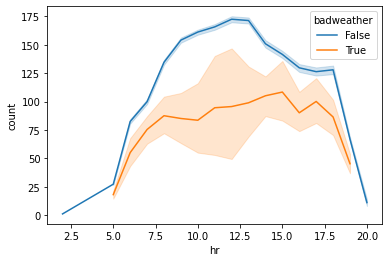

In [28]:
sns.lineplot(data=mdfsum, x="hr", y="count", hue="badweather")